<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj13/iris_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ustawienia wykresów
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 18

In [14]:
# -----------------------------------------------------------------------------
# 1. ZAŁADOWANIE DANYCH
# -----------------------------------------------------------------------------

iris = load_iris()
X = iris.data                    # 150 próbek × 4 cechy
y = iris.target                  # 3 gatunki (0, 1, 2)
nazwy_cech = ['Długość działki', 'Szerokość działki',
              'Długość płatka', 'Szerokość płatka']
nazwy_gatunkow = ['Setosa', 'Versicolor', 'Virginica']

In [15]:
print(f"\nWymiary danych: {X.shape[0]} próbek × {X.shape[1]} cechy")
print(f"Cechy: {nazwy_cech}")
print(f"Gatunki: {nazwy_gatunkow}")


Wymiary danych: 150 próbek × 4 cechy
Cechy: ['Długość działki', 'Szerokość działki', 'Długość płatka', 'Szerokość płatka']
Gatunki: ['Setosa', 'Versicolor', 'Virginica']


In [16]:
# -----------------------------------------------------------------------------
# 2. STANDARYZACJA DANYCH (WAŻNE!)
# -----------------------------------------------------------------------------
# PCA jest wrażliwe na skalę - zmienne o większej wariancji dominują!
# Dlatego ZAWSZE standaryzujemy dane przed PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("\n" + "-" * 60)
print("STANDARYZACJA (mean=0, std=1)")
print("-" * 60)
print(f"Przed: średnie = {X.mean(axis=0).round(2)}")
print(f"Po:    średnie = {X_std.mean(axis=0).round(2)}")


------------------------------------------------------------
STANDARYZACJA (mean=0, std=1)
------------------------------------------------------------
Przed: średnie = [5.84 3.06 3.76 1.2 ]
Po:    średnie = [-0. -0. -0. -0.]


In [17]:
# -----------------------------------------------------------------------------
# 3. WYKONANIE PCA
# -----------------------------------------------------------------------------

pca = PCA()  # Wszystkie składowe (domyślnie n_components = min(n_samples, n_features))
X_pca = pca.fit_transform(X_std)

print("\n" + "-" * 60)
print("WYNIKI PCA")
print("-" * 60)

# Wartości własne (eigenvalues) - pokazują "siłę" każdej składowej
print("\nWartości własne (eigenvalues):")
for i, ev in enumerate(pca.explained_variance_):
    print(f"  PC{i+1}: {ev:.3f}")

# Procent wyjaśnionej wariancji - kluczowa metryka!
print("\nWyjaśniona wariancja (%):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var*100:.1f}%")

# Skumulowana wariancja - ile łącznie wyjaśniają składowe
print(f"\nSkumulowana wariancja:")
cumsum = np.cumsum(pca.explained_variance_ratio_)
for i, cs in enumerate(cumsum):
    print(f"  PC1-PC{i+1}: {cs*100:.1f}%")

print("\n→ Wniosek: PC1 + PC2 wyjaśniają", f"{cumsum[1]*100:.1f}% wariancji!")
print("→ Można zredukować 4D → 2D z minimalną stratą informacji")


------------------------------------------------------------
WYNIKI PCA
------------------------------------------------------------

Wartości własne (eigenvalues):
  PC1: 2.938
  PC2: 0.920
  PC3: 0.148
  PC4: 0.021

Wyjaśniona wariancja (%):
  PC1: 73.0%
  PC2: 22.9%
  PC3: 3.7%
  PC4: 0.5%

Skumulowana wariancja:
  PC1-PC1: 73.0%
  PC1-PC2: 95.8%
  PC1-PC3: 99.5%
  PC1-PC4: 100.0%

→ Wniosek: PC1 + PC2 wyjaśniają 95.8% wariancji!
→ Można zredukować 4D → 2D z minimalną stratą informacji


In [18]:
# -----------------------------------------------------------------------------
# 4. ŁADUNKI (LOADINGS) - interpretacja składowych
# -----------------------------------------------------------------------------
print("\n" + "-" * 60)
print("ŁADUNKI SKŁADOWYCH (LOADINGS)")
print("-" * 60)
print("\nJak oryginalne cechy wpływają na główne składowe:\n")
print(f"{'Cecha':<20} {'PC1':>8} {'PC2':>8} {'PC3':>8} {'PC4':>8}")
print("-" * 50)
for i, nazwa in enumerate(nazwy_cech):
    loadings = pca.components_[:, i]
    print(f"{nazwa:<20} {loadings[0]:>8.3f} {loadings[1]:>8.3f} {loadings[2]:>8.3f} {loadings[3]:>8.3f}")

print("\n→ PC1: głównie długość i szerokość płatka (rozmiar płatka)")
print("→ PC2: głównie szerokość działki")


------------------------------------------------------------
ŁADUNKI SKŁADOWYCH (LOADINGS)
------------------------------------------------------------

Jak oryginalne cechy wpływają na główne składowe:

Cecha                     PC1      PC2      PC3      PC4
--------------------------------------------------
Długość działki         0.521    0.377    0.720   -0.261
Szerokość działki      -0.269    0.923   -0.244    0.124
Długość płatka          0.580    0.024   -0.142    0.801
Szerokość płatka        0.565    0.067   -0.634   -0.524

→ PC1: głównie długość i szerokość płatka (rozmiar płatka)
→ PC2: głównie szerokość działki


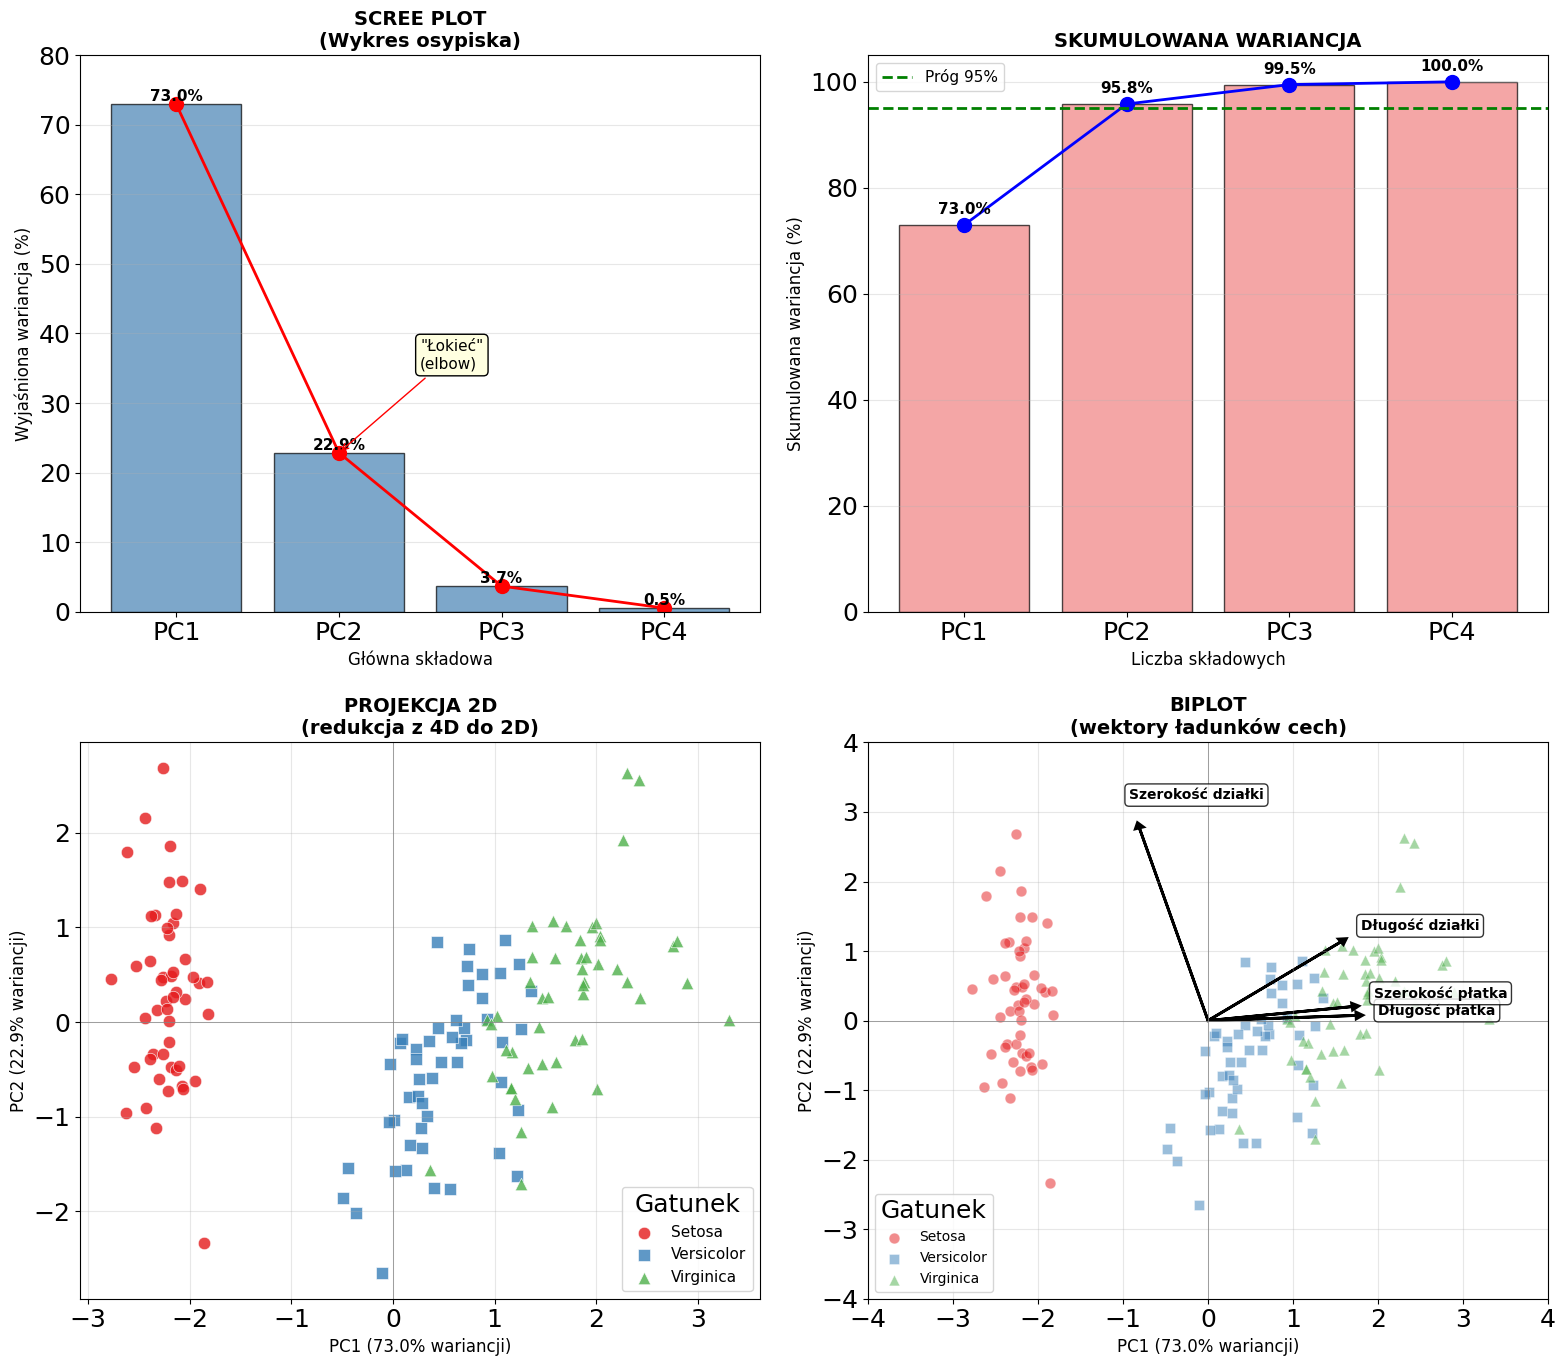

In [19]:
# -----------------------------------------------------------------------------
# 5. WIZUALIZACJE
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# --- Wykres 1: Scree Plot ---
ax1 = axes[0, 0]
pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
variance_pct = pca.explained_variance_ratio_ * 100

bars = ax1.bar(pc_labels, variance_pct, color='steelblue', edgecolor='black', alpha=0.7)
ax1.plot(pc_labels, variance_pct, 'ro-', markersize=10, linewidth=2)
ax1.set_ylabel('Wyjaśniona wariancja (%)', fontsize=12)
ax1.set_xlabel('Główna składowa', fontsize=12)
ax1.set_title('SCREE PLOT\n(Wykres osypiska)', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 80)

# Adnotacje na słupkach
for bar, pct in zip(bars, variance_pct):
    ax1.annotate(f'{pct:.1f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

# Zaznaczenie "łokcia"
ax1.annotate('"Łokieć"\n(elbow)', xy=(1, variance_pct[1]), xytext=(1.5, 35),
             fontsize=11, arrowprops=dict(arrowstyle='->', color='red'),
             bbox=dict(boxstyle='round', facecolor='lightyellow'))
ax1.grid(axis='y', alpha=0.3)

# --- Wykres 2: Skumulowana wariancja ---
ax2 = axes[0, 1]
cumulative = np.cumsum(variance_pct)
ax2.bar(pc_labels, cumulative, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.plot(pc_labels, cumulative, 'bo-', markersize=10, linewidth=2)
ax2.axhline(y=95, color='green', linestyle='--', linewidth=2, label='Próg 95%')
ax2.set_ylabel('Skumulowana wariancja (%)', fontsize=12)
ax2.set_xlabel('Liczba składowych', fontsize=12)
ax2.set_title('SKUMULOWANA WARIANCJA', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 105)
ax2.legend(fontsize=11)

for i, pct in enumerate(cumulative):
    ax2.annotate(f'{pct:.1f}%', xy=(i, pct + 2), ha='center', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# --- Wykres 3: Projekcja 2D (PC1 vs PC2) ---
ax3 = axes[1, 0]
colors = ['#e41a1c', '#377eb8', '#4daf4a']
markers = ['o', 's', '^']

for i, (gatunek, kolor, marker) in enumerate(zip(nazwy_gatunkow, colors, markers)):
    mask = y == i
    ax3.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=kolor, marker=marker, s=80, label=gatunek,
                edgecolor='white', linewidth=0.5, alpha=0.8)

ax3.set_xlabel(f'PC1 ({variance_pct[0]:.1f}% wariancji)', fontsize=12)
ax3.set_ylabel(f'PC2 ({variance_pct[1]:.1f}% wariancji)', fontsize=12)
ax3.set_title('PROJEKCJA 2D\n(redukcja z 4D do 2D)', fontsize=14, fontweight='bold')
ax3.legend(title='Gatunek', fontsize=11)
ax3.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
ax3.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
ax3.grid(True, alpha=0.3)

# --- Wykres 4: Biplot (wektory cech) ---
ax4 = axes[1, 1]

# Punkty danych
for i, (gatunek, kolor, marker) in enumerate(zip(nazwy_gatunkow, colors, markers)):
    mask = y == i
    ax4.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=kolor, marker=marker, s=60, label=gatunek,
                edgecolor='white', linewidth=0.5, alpha=0.5)

# Wektory cech (loadings) - pokazują kierunek i siłę wpływu każdej cechy
scale = 3  # skalowanie wektorów dla widoczności
for i, nazwa in enumerate(nazwy_cech):
    if i == 3:
        ax4.arrow(0, 0,
              pca.components_[0, i] * scale,
              pca.components_[1, i] * scale,
              head_width=0.1, head_length=0.08, fc='black', ec='black', linewidth=2)
        ax4.text(pca.components_[0, i] * scale * 1.15,
             pca.components_[1, i] * scale * 1.65,
             nazwa, fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    else:
        ax4.arrow(0, 0,
              pca.components_[0, i] * scale,
              pca.components_[1, i] * scale,
              head_width=0.1, head_length=0.08, fc='black', ec='black', linewidth=2)
        ax4.text(pca.components_[0, i] * scale * 1.15,
             pca.components_[1, i] * scale * 1.15,
             nazwa, fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


ax4.set_xlabel(f'PC1 ({variance_pct[0]:.1f}% wariancji)', fontsize=12)
ax4.set_ylabel(f'PC2 ({variance_pct[1]:.1f}% wariancji)', fontsize=12)
ax4.set_title('BIPLOT\n(wektory ładunków cech)', fontsize=14, fontweight='bold')
ax4.legend(title='Gatunek', fontsize=10, loc='lower left')
ax4.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
ax4.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
ax4.set_xlim(-4, 4)
ax4.set_ylim(-4, 4)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_iris_demo.png', dpi=150, bbox_inches='tight')
plt.show()

In [20]:
# -----------------------------------------------------------------------------
# 6. BONUS: PCA z redukcją do 2 składowych
# -----------------------------------------------------------------------------
print("\n" + "-" * 60)
print("BONUS: Użycie PCA do redukcji wymiarów")
print("-" * 60)

# Możemy też od razu zdefiniować liczbę składowych
pca_2d = PCA(n_components=2)
X_reduced = pca_2d.fit_transform(X_std)

print(f"\nOryginalne wymiary: {X_std.shape}")
print(f"Po redukcji PCA:    {X_reduced.shape}")
print(f"\nZachowana wariancja: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%")


------------------------------------------------------------
BONUS: Użycie PCA do redukcji wymiarów
------------------------------------------------------------

Oryginalne wymiary: (150, 4)
Po redukcji PCA:    (150, 2)

Zachowana wariancja: 95.8%
